In [64]:

#libraries
import os 
import random 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
from PIL import Image
from skimage import img_as_float 
from IPython.display import display
import pathlib
from torchvision import transforms

# Download Yale Images

In [66]:
ROOT_PATH = os.path.dirname(os.path.abspath("__file__"))
DATA_DIR = ROOT_PATH + '/data/yale'

img_data = []

In [67]:
for f in os.listdir(DATA_DIR): 
    if f != '.DS_Store' or f != 'not_included':
        img_path = DATA_DIR + '/'
        img_data = [img_path + img for img in os.listdir(img_path)]
    

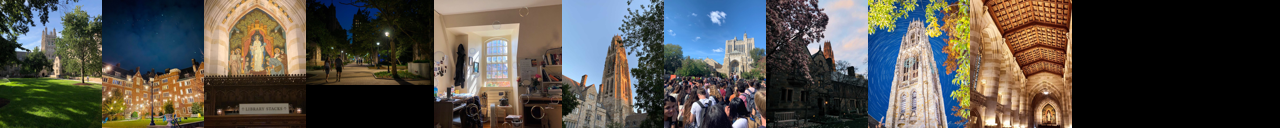

In [68]:
sample_size = 10
ims = [Image.open(x) for x in random.sample(img_data, sample_size)]
im_size = 128 
new_im = Image.new('RGB', (im_size*sample_size, im_size))
x_offset = 0 
for i in ims: 
    i.thumbnail((im_size, im_size))
    new_im.paste(i, (x_offset, 0))
    x_offset += i.size[0]

display(new_im) 

In [11]:
len(img_data)

492

# Transform Yale Images

In [69]:
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
])
output_dir = 'data/filtered_yale'
for filename in os.listdir(DATA_DIR):
    if filename.endswith((".jpg", ".png", ".jpeg")):  # Filter image files
        input_path = os.path.join(DATA_DIR, filename)
        output_path = os.path.join(output_dir, filename)

        # Open the image
        with Image.open(input_path) as img:
            # Apply the transformation
            transformed_img = transform(img)
            
            # Convert back to a PIL image and save it
            transformed_pil_img = transforms.ToPILImage()(transformed_img)
            transformed_pil_img.save(output_path)


# Download Places365 images

In [2]:
import os
import torch
from torchvision import datasets, transforms

In [3]:
root_dir = "data/places365"

In [4]:
# Ensure the root directory exists
os.makedirs(root_dir, exist_ok=True)

In [5]:
#download once 
# Load the Places365 dataset
# places365_dataset = datasets.Places365(
#     root=root_dir,
#     split='val',  # Choose 'val' if you want validation set
#     small=True,             # Use smaller images (256x256)
#     download=True,          # Download the dataset
#     transform=transform     # Apply the defined transformations
# )


In [6]:
places365_dataset = datasets.Places365(root='data/places365/', download=False)

In [7]:
categories = places365_dataset.classes

In [26]:
labels = {"/b/bookstore": 'bookstore', 
 "/d/dorm_room":'dorm_room', 
 '/c/coffee_shop':'coffee_shop',
 '/c/courtyard':'courtyard',
'/d/dining_hall':'dining_hall', 
'/a/art_gallery':'art_gallery', 
'/c/catacomb':'catacomb', 
'/c/castle':'castle', 
'/m/museum/indoor':'museum_indoor',
'/o/office':'office',
'/o/office_building':'office_building',
'/p/palace':'palace',
'/p/physics_laboratory':'physics_lab',
'/s/schoolhouse':'schoolhouse',
'/l/library/indoor':'library_indoor',
'/l/library/outdoor':'library_outdoor',
'/l/lecture_room': 'lecture_room',
'/p/pasture':'pasture',
'/o/office_cubicles':"office_cubicles",
'/o/office_building':'office_building',
'/o/office':'office',
'/n/natural_history_museum':'natural_history_museum',
'/m/museum/outdoor':'museum_outdoor',
'/m/mausoleum':"mausoleum",
'/j/jail_cell':'jail_cell'}

In [36]:
category_to_idx = {category: idx for idx, category in enumerate(categories)}
print("Mapping of Categories to Indices:")
desired_categories = labels.keys()
for category in desired_categories:  # Replace with your desired categories
    print(f"{category}: {category_to_idx.get(category, 'Not Found')}")


Mapping of Categories to Indices:
/b/bookstore: 60
/d/dorm_room: 124
/c/coffee_shop: 99
/c/courtyard: 109
/d/dining_hall: 120
/a/art_gallery: 19
/c/catacomb: 85
/c/castle: 84
/m/museum/indoor: 236
/o/office: 244
/o/office_building: 245
/p/palace: 252
/p/physics_laboratory: 264
/s/schoolhouse: 296
/l/library/indoor: 212
/l/library/outdoor: 213
/l/lecture_room: 210
/p/pasture: 258
/o/office_cubicles: 246
/n/natural_history_museum: 239
/m/museum/outdoor: 237
/m/mausoleum: 226
/j/jail_cell: 196


In [35]:
places365_dataset = datasets.Places365(root='data/places365', split='val', download=False)
print(f"Number of images in split: {len(places365_dataset)}")


Number of images in split: 36500


In [62]:
# Reverse mapping: Map indices back to desired labels
desired_indices = {category_to_idx[key]: labels[key] for key in labels if key in category_to_idx}

# Dictionary to track image counters for each category
saved_count = {category: 0 for category in desired_indices.values()}

print(f"Desired Indices: {desired_indices}")
total_images = 500 
output_dir = 'data/filtered_places365'


Desired Indices: {60: 'bookstore', 124: 'dorm_room', 99: 'coffee_shop', 109: 'courtyard', 120: 'dining_hall', 19: 'art_gallery', 85: 'catacomb', 84: 'castle', 236: 'museum_indoor', 244: 'office', 245: 'office_building', 252: 'palace', 264: 'physics_lab', 296: 'schoolhouse', 212: 'library_indoor', 213: 'library_outdoor', 210: 'lecture_room', 258: 'pasture', 246: 'office_cubicles', 239: 'natural_history_museum', 237: 'museum_outdoor', 226: 'mausoleum', 196: 'jail_cell'}


In [63]:
# Save images into a single folder with category name + counter as the filename
total_images = 500  # Total number of images to save
current_total = 0
for idx, (image, label) in enumerate(places365_dataset):
    # Check if the label corresponds to one of the desired categories
    if label in desired_indices:
        category = desired_indices[label]
        saved_count[category] += 1
        
        # Save the image with category name + counter as the filename
        image_name = f"{category}_{saved_count[category]}.jpg"
        image_path = os.path.join(output_dir, image_name)
        image.save(image_path)

        current_total += 1
        if current_total >= total_images:
            break
print(f"Downloaded {current_total} images into {output_dir}")

Downloaded 500 images into data/filtered_places365


# Shuffle and Split

In [6]:
import random
import shutil

In [ ]:
#renaming all yale files 
folder_path = 'data/filtered_yale'
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for i, filename in enumerate(files, start=1):
    # Get the file extension
    file_extension = os.path.splitext(filename)[1]

    # Create the new filename
    new_filename = f"yale_{i}{file_extension}"

    # Get the full paths
    old_file_path = os.path.join(folder_path, filename)
    new_file_path = os.path.join(folder_path, new_filename)

    # Rename the file
    os.rename(old_file_path, new_file_path)


In [17]:
#renaming all yale files 
folder_path = 'data/filtered_places365'
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for i, filename in enumerate(files, start=1):
    # Get the file extension
    file_extension = os.path.splitext(filename)[1]

    # Create the new filename
    new_filename = f"notyale_{i}{file_extension}"

    # Get the full paths
    old_file_path = os.path.join(folder_path, filename)
    new_file_path = os.path.join(folder_path, new_filename)

    # Rename the file
    os.rename(old_file_path, new_file_path)


In [18]:
folder1 = 'data/filtered_places365'
folder2 = 'data/filtered_yale'

output_base = 'data/output'
train_dir = os.path.join(output_base, "train")
val_dir = os.path.join(output_base, "val")
test_dir = os.path.join(output_base, "test")



In [19]:
# Create output directories
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)


In [20]:

# Load all images from both folders
images = []
for folder in [folder1, folder2]:
    for filename in os.listdir(folder):
        if filename.endswith((".jpg", ".png", ".jpeg")):  # Filter image files
            images.append(os.path.join(folder, filename))

# Shuffle the combined list of images
random.seed(42)  # For reproducibility
random.shuffle(images)

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate the number of images in each split
total_images = len(images)
train_count = int(total_images * train_ratio)
val_count = int(total_images * val_ratio)


In [21]:

# Split the images
train_images = images[:train_count]
val_images = images[train_count:train_count + val_count]
test_images = images[train_count + val_count:]

# Helper function to copy images to a target folder
def copy_images(image_list, target_dir):
    for image_path in image_list:
        shutil.copy(image_path, target_dir)

# Copy images to respective directories
copy_images(train_images, train_dir)
copy_images(val_images, val_dir)
copy_images(test_images, test_dir)

print(f"Total images: {total_images}")
print(f"Training images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")
print(f"Testing images: {len(test_images)}")

Total images: 992
Training images: 694
Validation images: 198
Testing images: 100
